<a href="https://colab.research.google.com/github/Elwing-Chou/ml1206/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [14]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [16]:
# mnist: (60000, ) -> [7, 5, 8, ...]
# cifar10: (50000, 1) -> [[7], [5], [8]...]
# 答案 [[0, 1, 2], [2]...]
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

horse


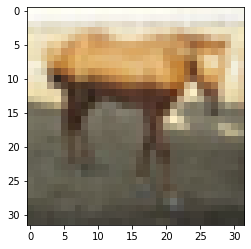

In [18]:
import matplotlib.pyplot as plt
idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
layers = [
    # 一個filter(3 * 3 * 3) * 64 + 64(bias) -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 一個filter(3 * 3 * 64) * 128 + 128(bias) -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    # 256 * 10 + 10(bias) -> 2570
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 256)       

In [20]:
# GAP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense
layers = [
    # 一個filter(3 * 3 * 3) * 64 + 64(bias) -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 一個filter(3 * 3 * 64) * 128 + 128(bias) -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 256)       

In [21]:
# 不用做one-hot
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [23]:
# 1 round: 54000 / 100 -> 540次梯度下降
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=100,
          epochs=100,
          verbose=2,
          validation_split=0.1,
          callbacks=callbacks)

Epoch 1/100
450/450 - 12s - loss: 1.6659 - accuracy: 0.3761 - val_loss: 1.3499 - val_accuracy: 0.5012 - 12s/epoch - 26ms/step
Epoch 2/100
450/450 - 11s - loss: 1.2472 - accuracy: 0.5509 - val_loss: 1.1415 - val_accuracy: 0.5902 - 11s/epoch - 24ms/step
Epoch 3/100
450/450 - 11s - loss: 1.0354 - accuracy: 0.6308 - val_loss: 0.9320 - val_accuracy: 0.6760 - 11s/epoch - 24ms/step
Epoch 4/100
450/450 - 11s - loss: 0.8974 - accuracy: 0.6825 - val_loss: 0.8282 - val_accuracy: 0.7094 - 11s/epoch - 24ms/step
Epoch 5/100
450/450 - 11s - loss: 0.8012 - accuracy: 0.7197 - val_loss: 0.7784 - val_accuracy: 0.7360 - 11s/epoch - 24ms/step
Epoch 6/100
450/450 - 10s - loss: 0.7100 - accuracy: 0.7508 - val_loss: 0.7141 - val_accuracy: 0.7528 - 10s/epoch - 23ms/step
Epoch 7/100
450/450 - 10s - loss: 0.6359 - accuracy: 0.7774 - val_loss: 0.7284 - val_accuracy: 0.7452 - 10s/epoch - 23ms/step
Epoch 8/100
450/450 - 11s - loss: 0.5777 - accuracy: 0.7989 - val_loss: 0.6905 - val_accuracy: 0.7660 - 11s/epoch - 24

In [24]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6725 - accuracy: 0.7851


[0.6725320816040039, 0.785099983215332]

In [25]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

array([5, 8, 8, ..., 5, 1, 7])

In [ ]:
# tensorflow: y_train_cat sklearn: y_train
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             index=["{}(True)".format(trans[i]) for i in range(10)],
             columns=["{}(Pred)".format(trans[i]) for i in range(10)])

In [35]:
# reshape(-1)
y_test_r = y_test.reshape(10000)
print(y_test[0])
print(y_test_r[0])

[3]
3


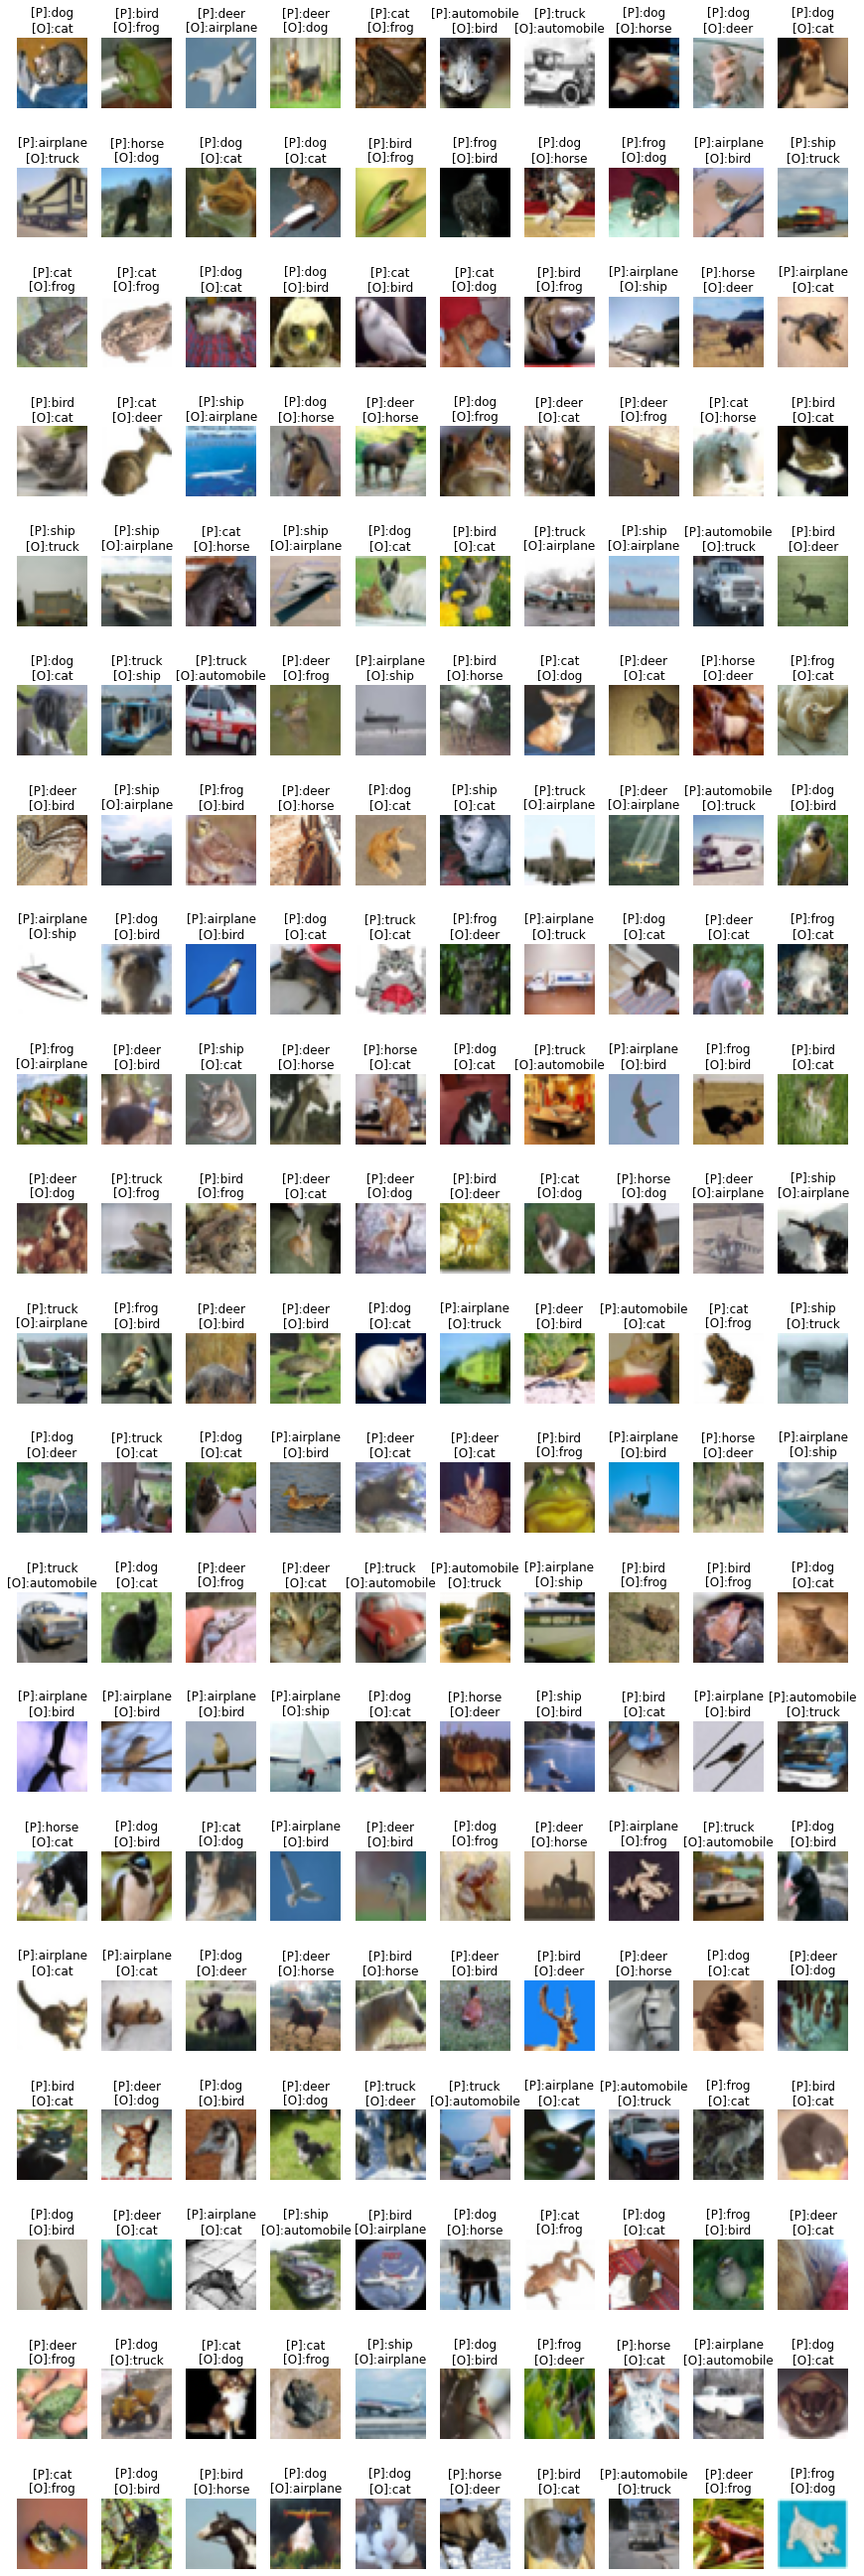

In [36]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
pre_false_pre = pre[idx]
pre_false_label = y_test_r[idx]
pre_false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(15, 50))

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[pre_false_pre[i]],
                                trans[pre_false_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i], cmap="gray")